In [2]:
from matplotlib import pyplot as plt
from typing import Optional
import seaborn as sns

import numpy as np


def show_matrix_with_colours(table: np.ndarray,
                             name: str = "",
                             row_labels=None,
                             col_labels=None,
                             save_to: Optional[str] = None,
                             fig_size: Optional[tuple[float]] = (10, 10)):
    if row_labels is None:
        row_labels = [str(i) for i in range(table.shape[0])]
    if col_labels is None:
        col_labels = [str(j) for j in range(table.shape[1])]

    fig, ax = plt.subplots(figsize=fig_size)
    sns.heatmap(
        table,
        cmap="viridis",
        center=0,
        linewidths=0.5,
        xticklabels=col_labels,
        yticklabels=row_labels,
        cbar=True
    )
    ax.set_title(name)
    plt.xticks(rotation=90, fontsize=6)
    plt.yticks(fontsize=6)
    plt.tight_layout()

    if save_to:
        plt.savefig(save_to)
    else:
        plt.show()

In [1]:


from Core.get_pRef import get_pRef_from_metaheuristic
from BenchmarkProblems.RoyalRoad import RoyalRoad

problem = RoyalRoad(5)

pRef = get_pRef_from_metaheuristic(problem=problem,
                                   sample_size=10000,
                                   which_algorithm="GA",
                                   unique=True)

print(pRef)

PRef with 884 samples, mean = 7.95


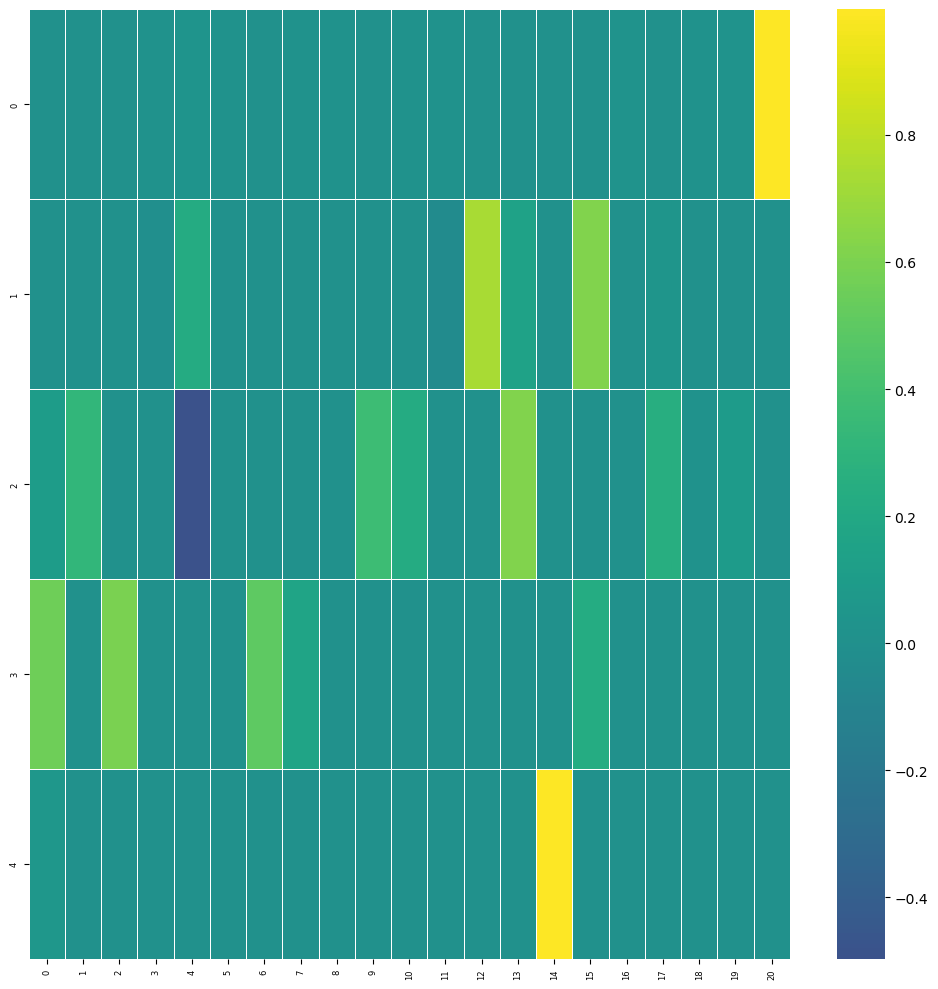

In [14]:
import numpy as np
from sklearn.decomposition import SparsePCA

M = pRef.full_solution_matrix
y = pRef.fitness_array
s = 5

M_with_y = np.hstack((M, y.reshape((-1, 1))))
spca = SparsePCA(n_components=s, alpha=1, random_state=0)
U = spca.fit_transform(M_with_y)      # sparse codes
V = spca.components_



show_matrix_with_colours(V)